In [3]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_travel = pd.read_csv('Traveldata_train.csv')
df_survey = pd.read_csv('Surveydata_train.csv')

In [6]:
df_travel.head(10)

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
5,98800006,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0
6,98800007,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0
7,98800008,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0
8,98800009,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0
9,98800010,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0


In [7]:
df_travel[df_travel['ArrivalDelay_in_Mins'].isnull()==True]

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
230,98800231,Male,NaN,27.0,Business travel,Business,4943,181.0,NaN
231,98800232,Female,Loyal Customer,24.0,Personal Travel,Eco,1711,10.0,NaN
265,98800266,Female,NaN,37.0,Business travel,Business,4019,0.0,NaN
418,98800419,Male,Loyal Customer,58.0,Business travel,Eco,2399,0.0,NaN
475,98800476,Female,NaN,39.0,Business travel,Business,2505,0.0,NaN
...,...,...,...,...,...,...,...,...,...
93293,98893294,Female,Loyal Customer,9.0,Personal Travel,Eco,1190,16.0,NaN
93837,98893838,Female,Loyal Customer,35.0,Business travel,Eco,1749,55.0,NaN
93918,98893919,Female,disloyal Customer,15.0,Business travel,Eco,2275,58.0,NaN
93987,98893988,Male,Loyal Customer,63.0,Personal Travel,Eco,1711,64.0,NaN


In [8]:
df_survey.head(10)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good
5,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,acceptable,acceptable,good,acceptable,acceptable,acceptable,acceptable
6,98800007,0,good,Green Car,excellent,good,Inconvinient,good,good,good,good,good,excellent,need improvement,excellent,acceptable,good
7,98800008,0,acceptable,Green Car,NaN,acceptable,Inconvinient,excellent,excellent,good,good,good,acceptable,good,good,good,excellent
8,98800009,0,need improvement,Green Car,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,need improvement,acceptable,need improvement,acceptable
9,98800010,0,need improvement,Ordinary,good,good,Convinient,acceptable,good,good,need improvement,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable


In [9]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

In [10]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [11]:
df_survey.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [12]:
df_merged = df_survey.merge(df_travel,on='ID',right_index=False,left_index=False)
df_merged.head(10)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
5,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,...,acceptable,acceptable,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0
6,98800007,0,good,Green Car,excellent,good,Inconvinient,good,good,good,...,acceptable,good,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0
7,98800008,0,acceptable,Green Car,NaN,acceptable,Inconvinient,excellent,excellent,good,...,good,excellent,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0
8,98800009,0,need improvement,Green Car,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable,...,need improvement,acceptable,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0
9,98800010,0,need improvement,Ordinary,good,good,Convinient,acceptable,good,good,...,need improvement,acceptable,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

<AxesSubplot:xlabel='Seat_comfort'>

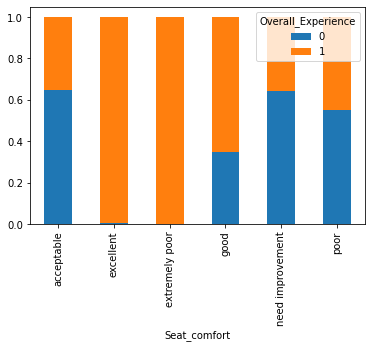

In [14]:
pd.crosstab(df_merged['Seat_comfort'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Arrival_time_convenient'>

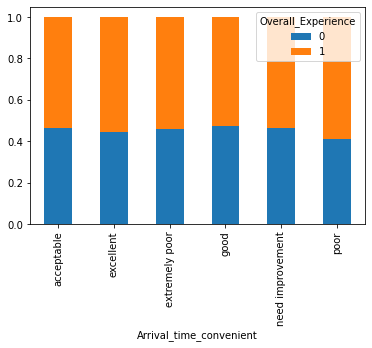

In [15]:
pd.crosstab(df_merged['Arrival_time_convenient'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Seat_Class'>

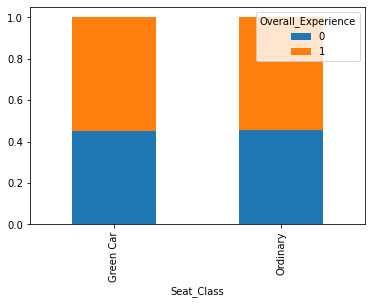

In [16]:

pd.crosstab(df_merged['Seat_Class'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Catering'>

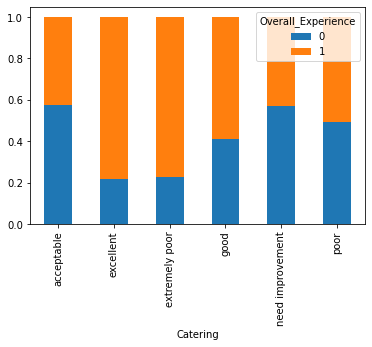

In [17]:
pd.crosstab(df_merged['Catering'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

In [18]:
df_merged.columns

Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

<AxesSubplot:xlabel='Onboardwifi_service'>

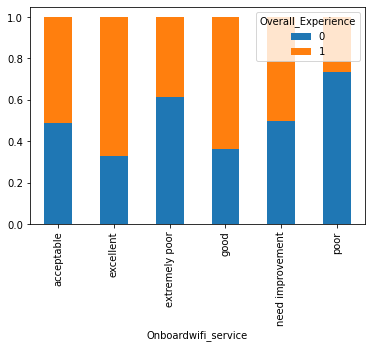

In [19]:

pd.crosstab(df_merged['Onboardwifi_service'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Onboard_entertainment'>

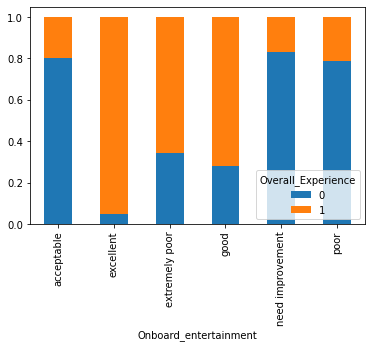

In [20]:
pd.crosstab(df_merged['Onboard_entertainment'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Leg_room'>

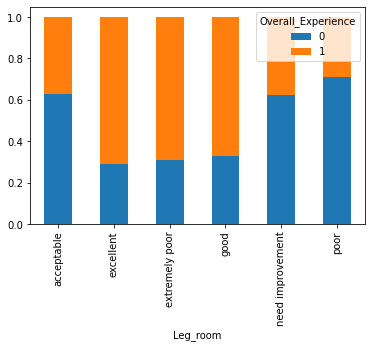

In [21]:
pd.crosstab(df_merged['Leg_room'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Baggage_handling'>

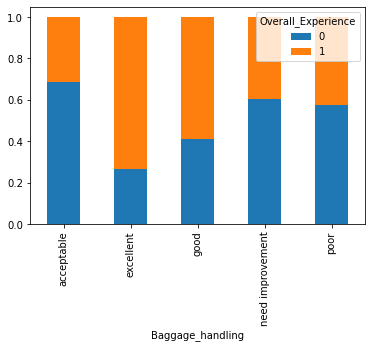

In [22]:
pd.crosstab(df_merged['Baggage_handling'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

Baggage Handling does seem to make an impact as well

<AxesSubplot:xlabel='Checkin_service'>

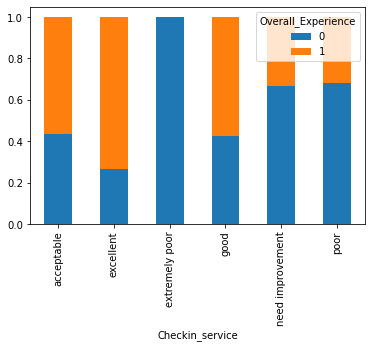

In [23]:
pd.crosstab(df_merged['Checkin_service'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

Checkin Service has a definite impact where we see only people who have rated Excellent > 50% of them have also given overall 1. Also 100% people who have rated extremely poor checkin service have given

<AxesSubplot:xlabel='Cleanliness'>

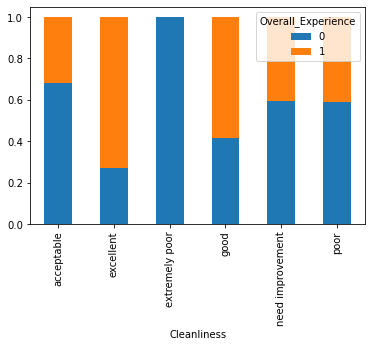

In [24]:
pd.crosstab(df_merged['Cleanliness'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

Cleanliness is also a very distinct indicator of Overall Exp. We see that- of all people who rated an overall exp of 1, almost 80% have had an excellent experience with cleanliness.

In [25]:
df_merged.columns

Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

<AxesSubplot:xlabel='Online_boarding'>

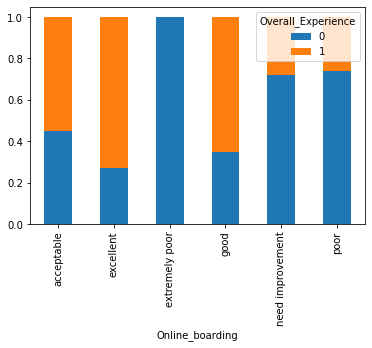

In [26]:
pd.crosstab(df_merged['Online_boarding'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

Online Borading also seems to have a clear impact. 100% of those who have rated Extremely poor online boarding exp. have also rated a 0 overall exp.

<AxesSubplot:xlabel='Online_support'>

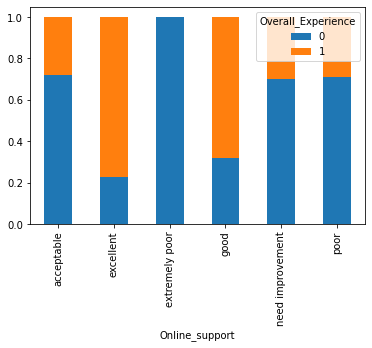

In [27]:
pd.crosstab(df_merged['Online_support'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Onlinebooking_Ease'>

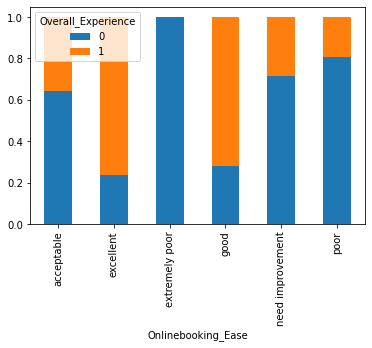

In [28]:
pd.crosstab(df_merged['Onlinebooking_Ease'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Onboard_service'>

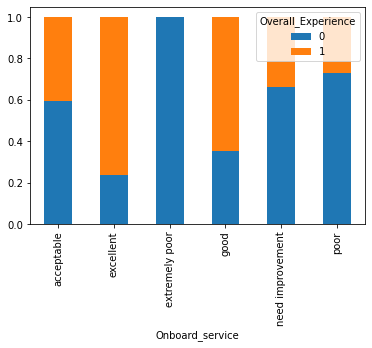

In [29]:
pd.crosstab(df_merged['Onboard_service'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Gender'>

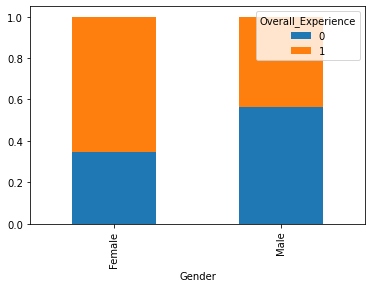

In [30]:
pd.crosstab(df_merged['Gender'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='CustomerType'>

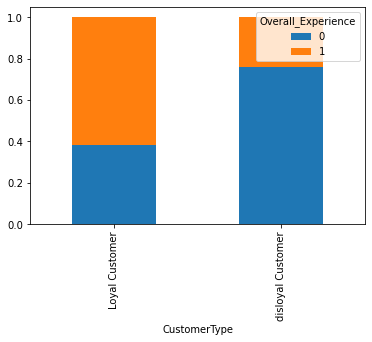

In [31]:
pd.crosstab(df_merged['CustomerType'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Platform_location'>

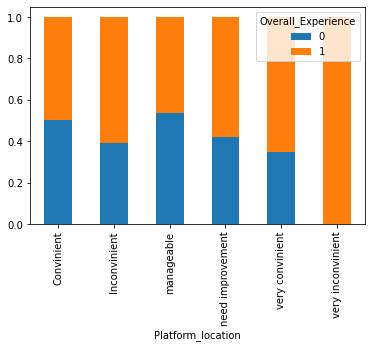

In [32]:
pd.crosstab(df_merged['Platform_location'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Travel_Class'>

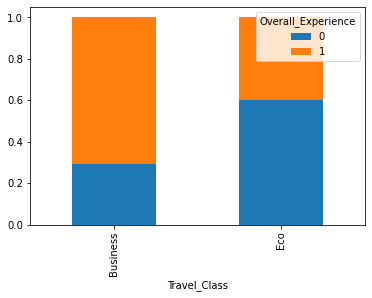

In [33]:
pd.crosstab(df_merged['Travel_Class'],df_merged['Overall_Experience'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Overall_Experience', ylabel='Travel_Distance'>

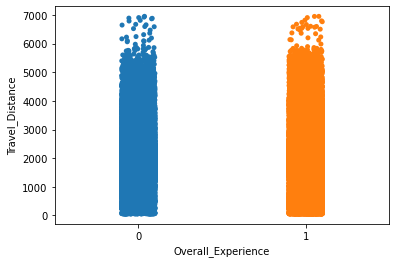

In [34]:
sns.stripplot(x='Overall_Experience',y='Travel_Distance',data=df_merged)

<AxesSubplot:xlabel='Overall_Experience', ylabel='Age'>

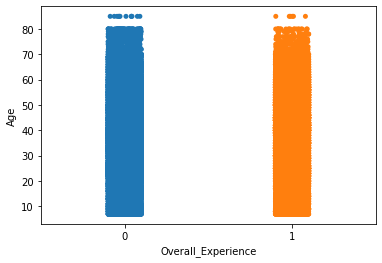

In [35]:
sns.stripplot(x='Overall_Experience',y='Age',data=df_merged)

<AxesSubplot:xlabel='Overall_Experience', ylabel='DepartureDelay_in_Mins'>

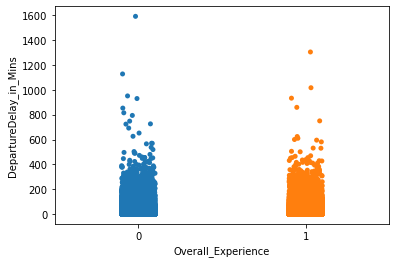

In [36]:
sns.stripplot(x='Overall_Experience',y='DepartureDelay_in_Mins',data=df_merged)

<AxesSubplot:xlabel='Overall_Experience', ylabel='ArrivalDelay_in_Mins'>

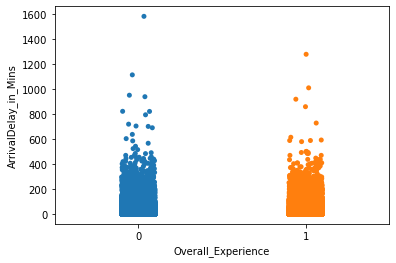

In [37]:
sns.stripplot(x='Overall_Experience',y='ArrivalDelay_in_Mins',data=df_merged)

In [38]:
df_merged['Total_Delay']= df_merged['DepartureDelay_in_Mins'] +df_merged['ArrivalDelay_in_Mins']

<AxesSubplot:xlabel='Overall_Experience', ylabel='Total_Delay'>

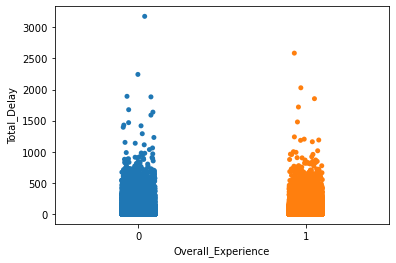

In [39]:
sns.stripplot(x='Overall_Experience',y='Total_Delay',data=df_merged)

<AxesSubplot:ylabel='Total_Delay'>

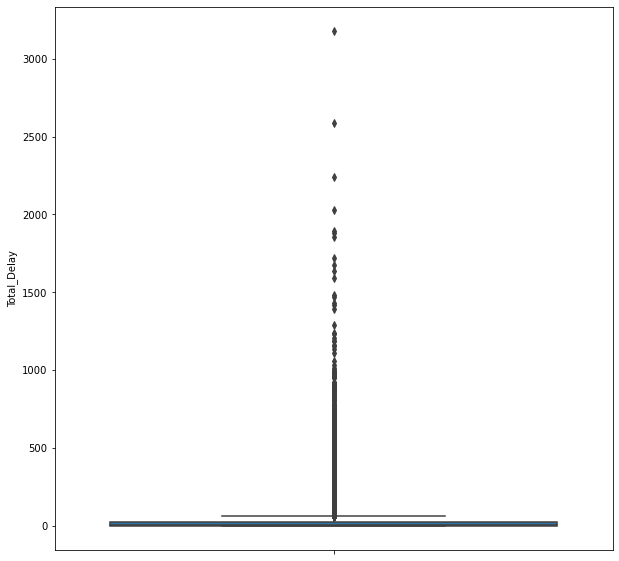

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df_merged['Total_Delay'])

In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

<AxesSubplot:xlabel='DepartureDelay_in_Mins', ylabel='Count'>

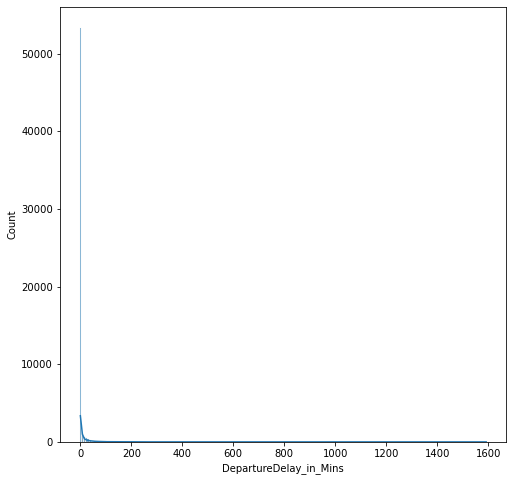

In [42]:
plt.figure(figsize=(8,8))
sns.histplot(df_merged['DepartureDelay_in_Mins'],kde=True)

In [43]:
df_merged['DepartureDelay_in_Mins'].median()

0.0

In [44]:
df_merged['DepartureDelay_in_Mins'].fillna(df_merged['DepartureDelay_in_Mins'].median(),inplace=True)

In [45]:
df_merged['ArrivalDelay_in_Mins'].median()

0.0

In [46]:
df_merged['ArrivalDelay_in_Mins'].fillna(df_merged['ArrivalDelay_in_Mins'].median(),inplace=True)

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [48]:
df_merged['Total_Delay']=df_merged['DepartureDelay_in_Mins']+df_merged['ArrivalDelay_in_Mins']

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

<AxesSubplot:xlabel='Total_Delay', ylabel='Count'>

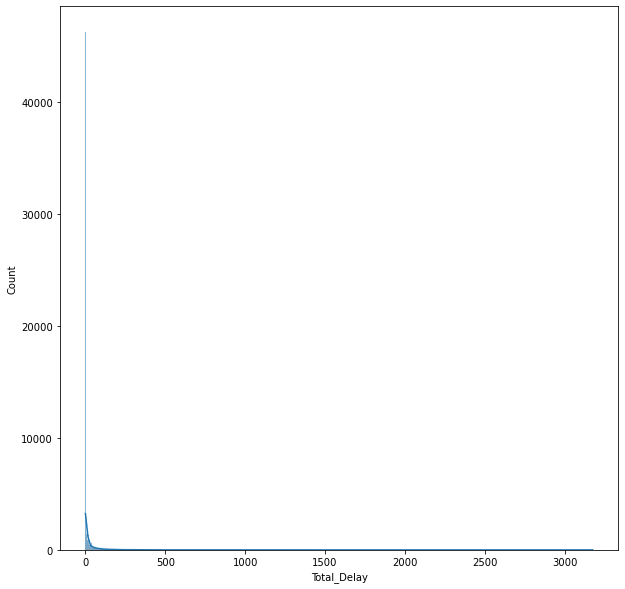

In [50]:
plt.figure(figsize=(10,10))
sns.histplot(df_merged['Total_Delay'],kde=True)

In [51]:
def outliers(col):
    Q1, Q3 = np.quantile(col, [0.25, 0.75])
    IQR = Q3-Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return(LL, UL)

In [52]:
LL,UL = outliers(df_merged['Total_Delay'])

In [53]:
print(LL)
print(UL)

-36.0
60.0


In [54]:
for cols in df_merged.columns:
    if df_merged[cols].dtype=='object':
        df_merged[cols].fillna(df_merged[cols].mode()[0],inplace=True)

In [55]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94379 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  94379 non-null  object 
 5   Catering                 94379 non-null  object 
 6   Platform_location        94379 non-null  object 
 7   Onboardwifi_service      94379 non-null  object 
 8   Onboard_entertainment    94379 non-null  object 
 9   Online_support           94379 non-null  object 
 10  Onlinebooking_Ease       94379 non-null  object 
 11  Onboard_service          94379 non-null  object 
 12  Leg_room                 94379 non-null  object 
 13  Baggage_handling         94379 non-null  object 
 14  Checkin_service       

In [56]:
df_merged.isnull().sum()

ID                          0
Overall_Experience          0
Seat_comfort                0
Seat_Class                  0
Arrival_time_convenient     0
Catering                    0
Platform_location           0
Onboardwifi_service         0
Onboard_entertainment       0
Online_support              0
Onlinebooking_Ease          0
Onboard_service             0
Leg_room                    0
Baggage_handling            0
Checkin_service             0
Cleanliness                 0
Online_boarding             0
Gender                      0
CustomerType                0
Age                        33
TypeTravel                  0
Travel_Class                0
Travel_Distance             0
DepartureDelay_in_Mins      0
ArrivalDelay_in_Mins        0
Total_Delay                 0
dtype: int64

In [57]:
df_merged['Age'].fillna(df_merged['Age'].mean(),inplace=True)

In [58]:
df_merged.isnull().sum()

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Total_Delay                0
dtype: int64

In [59]:
df_merged.columns

Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Total_Delay'],
      dtype='object')

In [60]:
df_model_all= df_merged.drop('ID',axis=1,inplace=False)

In [61]:
df_model_all.columns

Index(['Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Total_Delay'],
      dtype='object')

In [62]:
for cols in df_model_all.columns:
    if df_model_all[cols].dtype=='object':
        print(df_model_all[cols].value_counts(normalize=True))

acceptable          0.224828
need improvement    0.221935
good                0.218216
poor                0.160894
excellent           0.137435
extremely poor      0.036692
Name: Seat_comfort, dtype: float64
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
good                0.302016
excellent           0.187372
acceptable          0.160809
need improvement    0.158828
poor                0.145075
extremely poor      0.045900
Name: Arrival_time_convenient, dtype: float64
acceptable          0.288295
need improvement    0.190487
good                0.190392
poor                0.146834
excellent           0.142563
extremely poor      0.041429
Name: Catering, dtype: float64
manageable           0.256445
Convinient           0.232170
need improvement     0.188940
Inconvinient         0.174287
very convinient      0.148137
very inconvinient    0.000021
Name: Platform_location, dtype: float64
good                0.242268
excellent           0.222168
acceptable 

In [63]:
collist=['Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class']
for i in collist:
    df_model_all[i]=np.where(df_model_all[i] =='extremely poor', 0, df_model_all[i])
    df_model_all[i]=np.where(df_model_all[i] =='poor', 1, df_model_all[i])
    df_model_all[i]=np.where(df_model_all[i] =='need improvement', 2, df_model_all[i])
    df_model_all[i]=np.where(df_model_all[i] =='acceptable', 3, df_model_all[i])
    df_model_all[i]=np.where(df_model_all[i] =='good', 4, df_model_all[i])
    df_model_all[i]=np.where(df_model_all[i] =='excellent', 5, df_model_all[i])

In [64]:
df_model_all['Platform_location']=np.where(df_model_all['Platform_location'] =='very inconvinient', 0, df_model_all['Platform_location'])
df_model_all['Platform_location']=np.where(df_model_all['Platform_location'] =='Inconvinient', 1, df_model_all['Platform_location'])
df_model_all['Platform_location']=np.where(df_model_all['Platform_location'] =='need improvement', 2, df_model_all['Platform_location'])
df_model_all['Platform_location']=np.where(df_model_all['Platform_location'] =='manageable', 3, df_model_all['Platform_location'])
df_model_all['Platform_location']=np.where(df_model_all['Platform_location'] =='Convinient', 4, df_model_all['Platform_location'])
df_model_all['Platform_location']=np.where(df_model_all['Platform_location'] =='very convinient', 5, df_model_all['Platform_location'])

In [65]:
df_model_all['Gender'] = pd.get_dummies(df_model_all['Gender'],drop_first=True)
df_model_all['CustomerType'] = pd.get_dummies(df_model_all['CustomerType'],drop_first=True)
df_model_all['Travel_Class'] = pd.get_dummies(df_model_all['Travel_Class'],drop_first=True)

In [66]:
df_model_all['Seat_Class'] = pd.get_dummies(df_model_all['Seat_Class'],drop_first=True)
df_model_all['TypeTravel'] = pd.get_dummies(df_model_all['TypeTravel'],drop_first=True)

In [67]:
for cols in df_model_all.columns:
    if df_model_all[cols].dtype=='object':
        print(df_model_all[cols].value_counts(normalize=True))

3    0.224828
2    0.221935
4    0.218216
1    0.160894
5    0.137435
0    0.036692
Name: Seat_comfort, dtype: float64
4    0.302016
5    0.187372
3    0.160809
2    0.158828
1    0.145075
0    0.045900
Name: Arrival_time_convenient, dtype: float64
3    0.288295
2    0.190487
4    0.190392
1    0.146834
5    0.142563
0    0.041429
Name: Catering, dtype: float64
3    0.256445
4    0.232170
2    0.188940
1    0.174287
5    0.148137
0    0.000021
Name: Platform_location, dtype: float64
4    0.242268
5    0.222168
3    0.213162
2    0.207631
1    0.113807
0    0.000964
Name: Onboardwifi_service, dtype: float64
4    0.322784
5    0.229331
3    0.186058
2    0.147554
1    0.091556
0    0.022717
Name: Onboard_entertainment, dtype: float64
4    0.319001
5    0.274362
3    0.166372
2    0.132529
1    0.107725
0    0.000011
Name: Online_support, dtype: float64
4    0.307081
5    0.262177
3    0.173662
2    0.153413
1    0.103498
0    0.000170
Name: Onlinebooking_Ease, dtype: float64
4    0.36942

In [68]:
for cols in df_model_all.columns:
    if df_model_all[cols].dtype=='object':
        df_model_all[cols] = df_model_all[cols].astype('int64')

In [69]:
df_model_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_comfort             94379 non-null  int64  
 2   Seat_Class               94379 non-null  uint8  
 3   Arrival_time_convenient  94379 non-null  int64  
 4   Catering                 94379 non-null  int64  
 5   Platform_location        94379 non-null  int64  
 6   Onboardwifi_service      94379 non-null  int64  
 7   Onboard_entertainment    94379 non-null  int64  
 8   Online_support           94379 non-null  int64  
 9   Onlinebooking_Ease       94379 non-null  int64  
 10  Onboard_service          94379 non-null  int64  
 11  Leg_room                 94379 non-null  int64  
 12  Baggage_handling         94379 non-null  int64  
 13  Checkin_service          94379 non-null  int64  
 14  Cleanliness           

## Test Train Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_all= df_model_all.drop('Overall_Experience',inplace=False,axis=1)
y_all= df_model_all.pop('Overall_Experience')

In [72]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3 , random_state=1)

In [73]:
X_train_all.shape

(66065, 24)

In [74]:
X_test_all.shape

(28314, 24)

In [75]:
y_train_all.shape

(66065,)

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
minmax = MinMaxScaler()
minmax.fit(X_train_all)
#minmax.fit(X_test_scaled)

MinMaxScaler()

In [78]:
X_train_all.head(10)

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Delay
16280,3,1,5,4,1,5,4,4,5,3,...,5,0,0,27.0,1,1,3011,0.0,5.0,5.0
65782,3,0,4,3,3,5,5,4,5,5,...,5,0,0,33.0,1,1,2401,0.0,0.0,0.0
92958,4,0,4,4,4,5,5,4,4,4,...,4,0,0,42.0,0,0,2338,1.0,0.0,1.0
15276,3,1,3,3,3,3,4,5,4,4,...,4,0,0,57.0,0,0,1790,0.0,0.0,0.0
64291,0,0,0,3,1,1,0,1,1,3,...,1,0,0,28.0,0,1,1717,0.0,0.0,0.0
62566,4,1,4,4,4,5,5,5,3,4,...,3,1,0,56.0,0,0,1749,1.0,0.0,1.0
42548,2,0,5,2,3,5,2,5,5,5,...,5,1,0,45.0,1,1,3292,5.0,0.0,5.0
91853,1,0,1,3,1,4,5,4,5,5,...,5,0,0,48.0,0,0,325,0.0,0.0,0.0
28544,2,1,4,2,3,2,2,2,2,3,...,2,0,1,23.0,0,0,1664,0.0,9.0,9.0
74031,3,1,2,3,4,2,3,2,2,2,...,2,1,0,66.0,0,1,1895,0.0,0.0,0.0


In [79]:
X_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 16280 to 77708
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_comfort             66065 non-null  int64  
 1   Seat_Class               66065 non-null  uint8  
 2   Arrival_time_convenient  66065 non-null  int64  
 3   Catering                 66065 non-null  int64  
 4   Platform_location        66065 non-null  int64  
 5   Onboardwifi_service      66065 non-null  int64  
 6   Onboard_entertainment    66065 non-null  int64  
 7   Online_support           66065 non-null  int64  
 8   Onlinebooking_Ease       66065 non-null  int64  
 9   Onboard_service          66065 non-null  int64  
 10  Leg_room                 66065 non-null  int64  
 11  Baggage_handling         66065 non-null  int64  
 12  Checkin_service          66065 non-null  int64  
 13  Cleanliness              66065 non-null  int64  
 14  Online_boarding   

In [80]:
y_train_all.value_counts(normalize=True)

1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64

In [81]:
y_train_all.value_counts(normalize=True)

1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64

In [82]:
df_merged['Overall_Experience'].value_counts(normalize=True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

## Naïve Bayes Model

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
NB_model = GaussianNB()
NB_model.fit(X_train_all,y_train_all)

GaussianNB()

In [85]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train_all)
model_score = NB_model.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.8128207068795883
[[23404  6595]
 [ 5771 30295]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     29999
           1       0.82      0.84      0.83     36066

    accuracy                           0.81     66065
   macro avg       0.81      0.81      0.81     66065
weighted avg       0.81      0.81      0.81     66065



In [86]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test_all)
model_score = NB_model.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.814897223988133
[[10023  2764]
 [ 2477 13050]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     12787
           1       0.83      0.84      0.83     15527

    accuracy                           0.81     28314
   macro avg       0.81      0.81      0.81     28314
weighted avg       0.81      0.81      0.81     28314



## KNN Model:

In [87]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(metric='euclidean', n_neighbors=8)
KNN_model.fit(X_train_all,y_train_all)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [88]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_all)
model_score = KNN_model.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.7617043820479831
[[23980  6019]
 [ 9724 26342]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     29999
           1       0.81      0.73      0.77     36066

    accuracy                           0.76     66065
   macro avg       0.76      0.76      0.76     66065
weighted avg       0.77      0.76      0.76     66065



In [89]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_all)
model_score = KNN_model.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.6790633608815427
[[ 9134  3653]
 [ 5434 10093]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     12787
           1       0.73      0.65      0.69     15527

    accuracy                           0.68     28314
   macro avg       0.68      0.68      0.68     28314
weighted avg       0.69      0.68      0.68     28314



## Random Forest Model:

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfcl = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=100,min_samples_leaf=33,random_state=1)
rfcl = rfcl.fit(X_train_all, y_train_all)

In [92]:
## Performance Matrix on train data set
y_train_predict = rfcl.predict(X_train_all)
model_score =rfcl.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.9119654885340195
[[26729  3270]
 [ 2546 33520]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     29999
           1       0.91      0.93      0.92     36066

    accuracy                           0.91     66065
   macro avg       0.91      0.91      0.91     66065
weighted avg       0.91      0.91      0.91     66065



In [93]:
## Performance Matrix on test data set
y_test_predict = rfcl.predict(X_test_all)
model_score =rfcl.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.9100445009535919
[[11358  1429]
 [ 1118 14409]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12787
           1       0.91      0.93      0.92     15527

    accuracy                           0.91     28314
   macro avg       0.91      0.91      0.91     28314
weighted avg       0.91      0.91      0.91     28314



## Bagging Model:

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
from sklearn.ensemble import BaggingClassifier

In [97]:
cart=DecisionTreeClassifier(max_depth=8, min_samples_split=100)
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=101,random_state=1)
print(Bagging_model)
Bagging_model.fit(X_train_all, y_train_all)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_split=100),
                  n_estimators=101, random_state=1)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_split=100),
                  n_estimators=101, random_state=1)

In [98]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train_all)
model_score =Bagging_model.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.925149474002876
[[27731  2268]
 [ 2677 33389]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     29999
           1       0.94      0.93      0.93     36066

    accuracy                           0.93     66065
   macro avg       0.92      0.93      0.92     66065
weighted avg       0.93      0.93      0.93     66065



In [99]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test_all)
model_score = Bagging_model.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.9211697393515575
[[11802   985]
 [ 1247 14280]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12787
           1       0.94      0.92      0.93     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



## Adaboost Model:

In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [101]:
cart=DecisionTreeClassifier(max_depth=8, min_samples_split=100)
ADB_model = AdaBoostClassifier(base_estimator=cart, n_estimators=101,random_state=1)
ADB_model.fit(X_train_all,y_train_all)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_samples_split=100),
                   n_estimators=101, random_state=1)

In [102]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train_all)
model_score = ADB_model.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

1.0
[[29999     0]
 [    0 36066]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



In [103]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test_all)
model_score = ADB_model.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.9387228932683478
[[11998   789]
 [  946 14581]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12787
           1       0.95      0.94      0.94     15527

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



## Gradient Boost Model:

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train_all, y_train_all)

In [105]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train_all)
model_score = gbcl.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.9206387648527965
[[27399  2600]
 [ 2643 33423]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     29999
           1       0.93      0.93      0.93     36066

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



In [106]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test_all)
model_score = gbcl.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.9191566009747828
[[11675  1112]
 [ 1177 14350]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12787
           1       0.93      0.92      0.93     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



## LDA Model:

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_all, y_train_all)

LinearDiscriminantAnalysis()

In [108]:
X_train_all.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Delay
16280,3,1,5,4,1,5,4,4,5,3,...,5,0,0,27.0,1,1,3011,0.0,5.0,5.0
65782,3,0,4,3,3,5,5,4,5,5,...,5,0,0,33.0,1,1,2401,0.0,0.0,0.0
92958,4,0,4,4,4,5,5,4,4,4,...,4,0,0,42.0,0,0,2338,1.0,0.0,1.0
15276,3,1,3,3,3,3,4,5,4,4,...,4,0,0,57.0,0,0,1790,0.0,0.0,0.0
64291,0,0,0,3,1,1,0,1,1,3,...,1,0,0,28.0,0,1,1717,0.0,0.0,0.0


In [109]:
X_train_delayLess = X_train_all.drop(['Total_Delay','Age'],axis=1,inplace=False)
print(X_train_all.shape)
print(X_train_delayLess.shape)

(66065, 24)
(66065, 22)


In [110]:
X_test_delayLess = X_test_all.drop(['Total_Delay','Age'],axis=1,inplace=False)
print(X_test_all.shape)
print(X_test_delayLess.shape)

(28314, 24)
(28314, 22)


In [111]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train_all)
model_score = LDA_model.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.8329372587603118
[[24297  5702]
 [ 5335 30731]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     29999
           1       0.84      0.85      0.85     36066

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065



In [112]:
## Performance Matrix on train data set
y_test_predict = LDA_model.predict(X_test_all)
model_score = LDA_model.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.8322737868192414
[[10370  2417]
 [ 2332 13195]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     12787
           1       0.85      0.85      0.85     15527

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.83     28314
weighted avg       0.83      0.83      0.83     28314



In [113]:
from xgboost import XGBClassifier

In [114]:
#fit model on training data
model = XGBClassifier()
model.fit(X_train_all, y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
## Performance Matrix on train data set
y_train_predict = model.predict(X_train_all)
model_score = model.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))

0.9724211004313933
[[29262   737]
 [ 1085 34981]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29999
           1       0.98      0.97      0.97     36066

    accuracy                           0.97     66065
   macro avg       0.97      0.97      0.97     66065
weighted avg       0.97      0.97      0.97     66065



In [116]:
## Performance Matrix on train data set
y_test_predict = model.predict(X_test_all)
model_score = model.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

0.952108497563043
[[12232   555]
 [  801 14726]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



In [117]:
model_XgB2= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
model_XgB2.fit(X_test_all, y_test_all)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [119]:
## Performance Matrix on train data set
y_train_predict_2 = model_XgB2.predict(X_train_all)
model_score = model_XgB2.score(X_train_all, y_train_all)
print(model_score)
print(metrics.confusion_matrix(y_train_all, y_train_predict_2))
print(metrics.classification_report(y_train_all, y_train_predict_2))

0.9203814425187316
[[27004  2995]
 [ 2265 33801]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     29999
           1       0.92      0.94      0.93     36066

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



In [120]:
## Performance Matrix on train data set
y_test_predict_2 = model_XgB2.predict(X_test_all)
model_score = model_XgB2.score(X_test_all, y_test_all)
print(model_score)
print(metrics.confusion_matrix(y_test_all, y_test_predict_2))
print(metrics.classification_report(y_test_all, y_test_predict_2))

0.9241011513738786
[[11585  1202]
 [  947 14580]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     12787
           1       0.92      0.94      0.93     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



## Grid Search on Random Forest

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [8,10],   # 10-15
    'min_samples_leaf': [500,30],   # min_sample_split/3
    'min_samples_split': [1500,100],   # 2%-3% (preference to cap @100)
    'max_features':[4,6],
    'n_estimators':[100,200],
 #   'base_estimator':['cart'],
}

rf_Grid=RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rf_Grid, param_grid = param_grid, cv = 3)

In [123]:
grid_search_rf.fit(X_train_all, y_train_all)
print(grid_search_rf.best_params_)
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

{'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 30, 'min_samples_split': 100, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=200, random_state=1)

In [124]:
y_train_predict = best_grid_rf.predict(X_train_all)
y_test_predict = best_grid_rf.predict(X_test_all)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

------- Train Data------------------
[[27302  2697]
 [ 2264 33802]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     29999
           1       0.93      0.94      0.93     36066

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065

------- Test Data------------------
[[11579  1208]
 [ 1016 14511]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12787
           1       0.92      0.93      0.93     15527

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



In [125]:
print(
    pd.DataFrame(np.round(best_grid_rf.feature_importances_,2),
                 columns=["Imp"],
                 index=X_train_all.columns).sort_values('Imp', ascending=False))

                          Imp
Onboard_entertainment    0.30
Seat_comfort             0.15
Onlinebooking_Ease       0.11
Online_support           0.08
CustomerType             0.04
Travel_Class             0.04
Leg_room                 0.04
Online_boarding          0.04
Catering                 0.03
Onboard_service          0.03
Gender                   0.03
TypeTravel               0.02
Baggage_handling         0.02
Cleanliness              0.02
Travel_Distance          0.01
Age                      0.01
Checkin_service          0.01
Onboardwifi_service      0.01
Platform_location        0.01
Arrival_time_convenient  0.01
Seat_Class               0.00
DepartureDelay_in_Mins   0.00
ArrivalDelay_in_Mins     0.00
Total_Delay              0.00


## Grid Search on Bagging

In [126]:
param_grid = {
    'base_estimator__criterion': ['gini'],
    'base_estimator__max_depth': [10,12],   # 10-15
    'base_estimator__min_samples_leaf': [50,30],   # min_sample_split/3
    'base_estimator__min_samples_split': [1500,100],   # 2%-3% (preference to cap @100)
    'n_estimators':[100,200],
 #   'base_estimator':['cart'],
}
cart=DecisionTreeClassifier()
Bagging_Grid=BaggingClassifier(base_estimator=cart,random_state=1)

grid_search = GridSearchCV(estimator = Bagging_Grid, param_grid = param_grid, cv = 3)

In [127]:
grid_search.fit(X_train_all, y_train_all)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 12, 'base_estimator__min_samples_leaf': 30, 'base_estimator__min_samples_split': 100, 'n_estimators': 100}


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                        min_samples_leaf=30,
                                                        min_samples_split=100),
                  n_estimators=100, random_state=1)

In [128]:
y_train_predict = best_grid.predict(X_train_all)
y_test_predict = best_grid.predict(X_test_all)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train_all, y_train_predict))
print(metrics.classification_report(y_train_all, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test_all, y_test_predict))
print(metrics.classification_report(y_test_all, y_test_predict))

------- Train Data------------------
[[27988  2011]
 [ 2259 33807]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     29999
           1       0.94      0.94      0.94     36066

    accuracy                           0.94     66065
   macro avg       0.93      0.94      0.93     66065
weighted avg       0.94      0.94      0.94     66065

------- Test Data------------------
[[11879   908]
 [ 1040 14487]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     12787
           1       0.94      0.93      0.94     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



## Grid Search on Gradient Boost

In [129]:
param_grid = {
    'tol': [0.0001,0.001],
    'max_depth': [12,15],   # 10-15
    'min_samples_leaf': [35,100],   # min_sample_split/3
    'min_samples_split': [100,300],   # 2%-3% (preference to cap @100)
    'n_estimators':[101,200],
    'max_features':[4,6]
 #   'base_estimator':['cart'],
}
gbcl =GradientBoostingClassifier(random_state=1)
grid_search_gb = GridSearchCV(estimator = gbcl, param_grid = param_grid, cv = 3)

In [130]:
grid_search_gb.fit(X_train_all, y_train_all)
print(grid_search_gb.best_params_)
best_grid_gb = grid_search_gb.best_estimator_
best_grid_gb

KeyboardInterrupt: 

## Grid Search on XGBoost

In [131]:
base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None

SyntaxError: cannot assign to literal (Temp/ipykernel_2652/1147320163.py, line 1)

In [132]:
param_grid = {
    "max_depth": [6,8],
    "learning_rate": [0.1],
    "gamma": [0, 0.25],
    "reg_lambda": [0, 1],
    "reg_lambda":[0,1],
    "subsample": [0.5, 0.7],
    "colsample_bytree": [0.5,0.7],
    "n_estimators":[100,200]
}

In [133]:
#fit model on training data
xgbg = XGBClassifier(random_state=1)
grid_search_Xgb = GridSearchCV(estimator = xgbg, param_grid = param_grid, cv = 5)

In [134]:
grid_search_Xgb.fit(X_train_all, y_train_all)
print(grid_search_Xgb.best_params_)
best_grid_Xgb = grid_search_Xgb.best_estimator_
best_grid_Xgb

{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.7}


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [135]:
y_train_predict_xg = best_grid_Xgb.predict(X_train_all)
y_test_predict_xg = best_grid_Xgb.predict(X_test_all)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train_all, y_train_predict_xg))
print(metrics.classification_report(y_train_all, y_train_predict_xg))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test_all, y_test_predict_xg))
print(metrics.classification_report(y_test_all, y_test_predict_xg))

------- Train Data------------------
[[29542   457]
 [  759 35307]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     29999
           1       0.99      0.98      0.98     36066

    accuracy                           0.98     66065
   macro avg       0.98      0.98      0.98     66065
weighted avg       0.98      0.98      0.98     66065

------- Test Data------------------
[[12249   538]
 [  761 14766]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
Log_model = LogisticRegression()

In [138]:
param_grid = {
    'solver' :['newton-cg','liblinear'],
    'penalty' : ['none','l1'],
    'C': [10, 1.0, 0.1],
    'max_iter': [10000,1000]
}
Log_model = LogisticRegression(n_jobs=2,random_state=1)
grid_search_LR = GridSearchCV(estimator = Log_model, param_grid = param_grid, cv = 5)

In [139]:
grid_search_LR.fit(X_train_all, y_train_all)
print(grid_search_LR.best_params_)
best_grid_LR = grid_search_LR.best_estimator_
best_grid_LR

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1153: Use

{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=0.1, max_iter=10000, n_jobs=2, penalty='l1',
                   random_state=1, solver='liblinear')

In [140]:
y_train_predict_lr = best_grid_LR.predict(X_train_all)
y_test_predict_lr = best_grid_LR.predict(X_test_all)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train_all, y_train_predict_lr))
print(metrics.classification_report(y_train_all, y_train_predict_lr))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test_all, y_test_predict_lr))
print(metrics.classification_report(y_test_all, y_test_predict_lr))

------- Train Data------------------
[[24296  5703]
 [ 5397 30669]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     29999
           1       0.84      0.85      0.85     36066

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065

------- Test Data------------------
[[10373  2414]
 [ 2345 13182]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     12787
           1       0.85      0.85      0.85     15527

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.83     28314
weighted avg       0.83      0.83      0.83     28314



In [141]:
X_train_2= X_train_all.drop(['Total_Delay','Age'],axis=1,inplace=False)
X_test_2= X_test_all.drop(['Total_Delay','Age'],axis=1,inplace=False)

In [142]:
print(X_train_2.shape)
print(X_test_2.shape)

(66065, 22)
(28314, 22)


In [143]:
grid_search_LR.fit(X_train_2, y_train_all)
print(grid_search_LR.best_params_)
best_grid_LR = grid_search_LR.best_estimator_
best_grid_LR

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1153: Use

{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=0.1, max_iter=10000, n_jobs=2, penalty='l1',
                   random_state=1, solver='liblinear')

In [144]:
y_train_predict_lr = best_grid_LR.predict(X_train_2)
y_test_predict_lr = best_grid_LR.predict(X_test_2)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train_all, y_train_predict_lr))
print(metrics.classification_report(y_train_all, y_train_predict_lr))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test_all, y_test_predict_lr))
print(metrics.classification_report(y_test_all, y_test_predict_lr))

------- Train Data------------------
[[24302  5697]
 [ 5433 30633]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     29999
           1       0.84      0.85      0.85     36066

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065

------- Test Data------------------
[[10390  2397]
 [ 2352 13175]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     12787
           1       0.85      0.85      0.85     15527

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.83     28314
weighted avg       0.83      0.83      0.83     28314



## Import Test Dataset and prep for Modelling

In [145]:
df_travel_test = pd.read_csv('Traveldata_test.csv')
df_survey_test = pd.read_csv('Surveydata_test.csv')

In [146]:
print(df_travel_test.shape)
print(df_survey_test.shape)

(35602, 9)
(35602, 16)


In [147]:
df_travel_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [148]:
df_survey_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [149]:
df_merged_test = df_survey_test.merge(df_travel_test,on='ID',right_index=False,left_index=False)
df_merged_test.head(10)

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0
5,99900006,poor,Green Car,NaN,poor,Inconvinient,good,good,good,acceptable,...,acceptable,good,Male,Loyal Customer,49.0,Business travel,Business,382,89.0,72.0
6,99900007,acceptable,Ordinary,acceptable,acceptable,Inconvinient,excellent,acceptable,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,40.0,Business travel,Business,1761,0.0,0.0
7,99900008,need improvement,Ordinary,need improvement,need improvement,need improvement,excellent,poor,excellent,good,...,good,excellent,Female,Loyal Customer,11.0,Personal Travel,Eco,3989,0.0,9.0
8,99900009,acceptable,Ordinary,good,good,Convinient,need improvement,acceptable,good,good,...,good,acceptable,Male,Loyal Customer,57.0,Business travel,Business,2731,0.0,0.0
9,99900010,need improvement,Green Car,excellent,excellent,very convinient,need improvement,need improvement,need improvement,acceptable,...,acceptable,need improvement,Female,Loyal Customer,43.0,NaN,Eco,2645,222.0,223.0


In [150]:
df_merged_test.shape

(35602, 24)

In [151]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [152]:
df_merged_test['DepartureDelay_in_Mins'].median()

0.0

In [153]:
df_merged_test['DepartureDelay_in_Mins'].fillna(df_merged_test['DepartureDelay_in_Mins'].median(),inplace=True)

In [154]:
df_merged_test['ArrivalDelay_in_Mins'].median()

0.0

In [155]:
df_merged_test['ArrivalDelay_in_Mins'].fillna(df_merged_test['ArrivalDelay_in_Mins'].median(),inplace=True)

In [156]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [158]:
X_train_all.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Total_Delay'],
      dtype='object')

In [160]:
df_merged_test['Total_Delay']=df_merged_test['DepartureDelay_in_Mins']+df_merged_test['ArrivalDelay_in_Mins']

In [161]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

<AxesSubplot:xlabel='Total_Delay'>

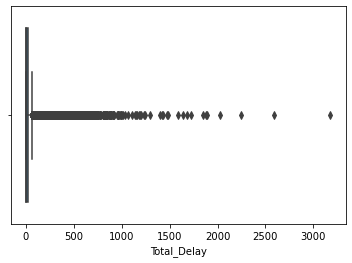

In [162]:
sns.boxplot(x=df_merged['Total_Delay'])

In [163]:
for cols in df_merged_test.columns:
    if df_merged_test[cols].dtype=='object':
        df_merged_test[cols].fillna(df_merged_test[cols].mode()[0],inplace=True)

In [164]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35602 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  35602 non-null  object 
 4   Catering                 35602 non-null  object 
 5   Platform_location        35602 non-null  object 
 6   Onboardwifi_service      35602 non-null  object 
 7   Onboard_entertainment    35602 non-null  object 
 8   Online_support           35602 non-null  object 
 9   Onlinebooking_Ease       35602 non-null  object 
 10  Onboard_service          35602 non-null  object 
 11  Leg_room                 35602 non-null  object 
 12  Baggage_handling         35602 non-null  object 
 13  Checkin_service          35602 non-null  object 
 14  Cleanliness           

In [165]:
df_merged_test.isnull().sum()

ID                          0
Seat_comfort                0
Seat_Class                  0
Arrival_time_convenient     0
Catering                    0
Platform_location           0
Onboardwifi_service         0
Onboard_entertainment       0
Online_support              0
Onlinebooking_Ease          0
Onboard_service             0
Leg_room                    0
Baggage_handling            0
Checkin_service             0
Cleanliness                 0
Online_boarding             0
Gender                      0
CustomerType                0
Age                        11
TypeTravel                  0
Travel_Class                0
Travel_Distance             0
DepartureDelay_in_Mins      0
ArrivalDelay_in_Mins        0
Total_Delay                 0
dtype: int64

In [166]:
df_merged_test['Age'].fillna(df_merged_test['Age'].mean(),inplace=True)

In [167]:
df_merged_test.isnull().sum()

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Total_Delay                0
dtype: int64

In [168]:
df_model_test2= df_merged_test.drop('ID',axis=1,inplace=False)

In [169]:
df_model_test2.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Total_Delay'],
      dtype='object')

In [170]:
for cols in df_model_test2.columns:
    if df_model_test2[cols].dtype=='object':
        print(df_model_test2[cols].value_counts(normalize=True))

acceptable          0.225409
need improvement    0.219960
good                0.219314
poor                0.161648
excellent           0.136341
extremely poor      0.037329
Name: Seat_comfort, dtype: float64
Ordinary     0.501657
Green Car    0.498343
Name: Seat_Class, dtype: float64
good                0.300152
excellent           0.185074
acceptable          0.164148
need improvement    0.159654
poor                0.144121
extremely poor      0.046851
Name: Arrival_time_convenient, dtype: float64
acceptable          0.294646
need improvement    0.188220
good                0.188220
poor                0.145441
excellent           0.141144
extremely poor      0.042329
Name: Catering, dtype: float64
manageable          0.263356
Convinient          0.229706
need improvement    0.188276
Inconvinient        0.172294
very convinient     0.146368
Name: Platform_location, dtype: float64
good                0.245913
excellent           0.221195
acceptable          0.210522
need improvement 

In [171]:
df_model_test2.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Total_Delay'],
      dtype='object')

In [172]:
collist=['Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class']
for i in collist:
    df_model_test2[i]=np.where(df_model_test2[i] =='extremely poor', 0, df_model_test2[i])
    df_model_test2[i]=np.where(df_model_test2[i] =='poor', 1, df_model_test2[i])
    df_model_test2[i]=np.where(df_model_test2[i] =='need improvement', 2, df_model_test2[i])
    df_model_test2[i]=np.where(df_model_test2[i] =='acceptable', 3, df_model_test2[i])
    df_model_test2[i]=np.where(df_model_test2[i] =='good', 4, df_model_test2[i])
    df_model_test2[i]=np.where(df_model_test2[i] =='excellent', 5, df_model_test2[i])

In [173]:
df_model_test2['Platform_location']=np.where(df_model_test2['Platform_location'] =='very inconvinient', 0, df_model_test2['Platform_location'])
df_model_test2['Platform_location']=np.where(df_model_test2['Platform_location'] =='Inconvinient', 1, df_model_test2['Platform_location'])
df_model_test2['Platform_location']=np.where(df_model_test2['Platform_location'] =='need improvement', 2, df_model_test2['Platform_location'])
df_model_test2['Platform_location']=np.where(df_model_test2['Platform_location'] =='manageable', 3, df_model_test2['Platform_location'])
df_model_test2['Platform_location']=np.where(df_model_test2['Platform_location'] =='Convinient', 4, df_model_test2['Platform_location'])
df_model_test2['Platform_location']=np.where(df_model_test2['Platform_location'] =='very convinient', 5, df_model_test2['Platform_location'])

In [174]:
df_model_test2['Gender'] = pd.get_dummies(df_model_test2['Gender'],drop_first=True)
df_model_test2['CustomerType'] = pd.get_dummies(df_model_test2['CustomerType'],drop_first=True)
df_model_test2['Travel_Class'] = pd.get_dummies(df_model_test2['Travel_Class'],drop_first=True)

In [175]:
df_model_test2['Seat_Class'] = pd.get_dummies(df_model_test2['Seat_Class'],drop_first=True)
df_model_test2['TypeTravel'] = pd.get_dummies(df_model_test2['TypeTravel'],drop_first=True)

In [176]:
for cols in df_model_test2.columns:
    if df_model_test2[cols].dtype=='object':
        print(df_model_test2[cols].value_counts(normalize=True))

3    0.225409
2    0.219960
4    0.219314
1    0.161648
5    0.136341
0    0.037329
Name: Seat_comfort, dtype: float64
4    0.300152
5    0.185074
3    0.164148
2    0.159654
1    0.144121
0    0.046851
Name: Arrival_time_convenient, dtype: float64
3    0.294646
2    0.188220
4    0.188220
1    0.145441
5    0.141144
0    0.042329
Name: Catering, dtype: float64
3    0.263356
4    0.229706
2    0.188276
1    0.172294
5    0.146368
Name: Platform_location, dtype: float64
4    0.245913
5    0.221195
3    0.210522
2    0.209426
1    0.111791
0    0.001152
Name: Onboardwifi_service, dtype: float64
4    0.321443
5    0.230436
3    0.187489
2    0.148278
1    0.088956
0    0.023398
Name: Onboard_entertainment, dtype: float64
4    0.323381
5    0.271474
3    0.165777
2    0.133560
1    0.105809
Name: Online_support, dtype: float64
4    0.310179
5    0.263468
3    0.169344
2    0.153755
1    0.103196
0    0.000056
Name: Onlinebooking_Ease, dtype: float64
4    0.367788
5    0.223049
3    0.19015

In [177]:
for cols in df_model_test2.columns:
    if df_model_test2[cols].dtype=='object':
        df_model_test2[cols] = df_model_test2[cols].astype('int64')

In [178]:
df_model_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_comfort             35602 non-null  int64  
 1   Seat_Class               35602 non-null  uint8  
 2   Arrival_time_convenient  35602 non-null  int64  
 3   Catering                 35602 non-null  int64  
 4   Platform_location        35602 non-null  int64  
 5   Onboardwifi_service      35602 non-null  int64  
 6   Onboard_entertainment    35602 non-null  int64  
 7   Online_support           35602 non-null  int64  
 8   Onlinebooking_Ease       35602 non-null  int64  
 9   Onboard_service          35602 non-null  int64  
 10  Leg_room                 35602 non-null  int64  
 11  Baggage_handling         35602 non-null  int64  
 12  Checkin_service          35602 non-null  int64  
 13  Cleanliness              35602 non-null  int64  
 14  Online_boarding       

In [179]:
df_model_test= df_merged_test[['Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'Travel_Class','Total_Delay']]

In [180]:
df_model_test.head(10)

,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,Travel_Class,Total_Delay
0,manageable,need improvement,excellent,good,excellent,excellent,excellent,good,excellent,poor,Female,Loyal Customer,36.0,Business,0.0
1,manageable,acceptable,poor,acceptable,acceptable,excellent,good,acceptable,excellent,acceptable,Female,disloyal Customer,21.0,Business,37.0
2,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,60.0,Business,0.0
3,very convinient,poor,acceptable,excellent,poor,acceptable,excellent,excellent,excellent,poor,Female,Loyal Customer,29.0,Eco,0.0
4,need improvement,excellent,excellent,excellent,excellent,good,excellent,excellent,excellent,excellent,Male,disloyal Customer,18.0,Business,17.0
5,Inconvinient,good,good,good,acceptable,acceptable,acceptable,acceptable,acceptable,good,Male,Loyal Customer,49.0,Business,161.0
6,Inconvinient,excellent,acceptable,excellent,excellent,acceptable,good,acceptable,excellent,excellent,Male,disloyal Customer,40.0,Business,0.0
7,need improvement,excellent,poor,excellent,good,good,good,excellent,good,excellent,Female,Loyal Customer,11.0,Eco,9.0
8,Convinient,need improvement,acceptable,good,good,good,acceptable,need improvement,good,acceptable,Male,Loyal Customer,57.0,Business,0.0
9,very convinient,need improvement,need improvement,need improvement,acceptable,good,acceptable,need improvement,acceptable,need improvement,Female,Loyal Customer,43.0,Eco,445.0


In [181]:
for cols in df_model_test.columns:
    if df_model_test[cols].dtype=='object':
        print(df_model_test[cols].value_counts(normalize=True))

manageable          0.263356
Convinient          0.229706
need improvement    0.188276
Inconvinient        0.172294
very convinient     0.146368
Name: Platform_location, dtype: float64
good                0.245913
excellent           0.221195
acceptable          0.210522
need improvement    0.209426
poor                0.111791
extremely poor      0.001152
Name: Onboardwifi_service, dtype: float64
good                0.321443
excellent           0.230436
acceptable          0.187489
need improvement    0.148278
poor                0.088956
extremely poor      0.023398
Name: Onboard_entertainment, dtype: float64
good                0.323381
excellent           0.271474
acceptable          0.165777
need improvement    0.133560
poor                0.105809
Name: Online_support, dtype: float64
good                0.310179
excellent           0.263468
acceptable          0.169344
need improvement    0.153755
poor                0.103196
extremely poor      0.000056
Name: Onlinebooking_Ease,

In [182]:
collist=['Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'Travel_Class','Total_Delay']
for i in collist:
    df_model_test[i]=np.where(df_model_test[i] =='extremely poor', 0, df_model_test[i])
    df_model_test[i]=np.where(df_model_test[i] =='poor', 1, df_model_test[i])
    df_model_test[i]=np.where(df_model_test[i] =='need improvement', 2, df_model_test[i])
    df_model_test[i]=np.where(df_model_test[i] =='acceptable', 3, df_model_test[i])
    df_model_test[i]=np.where(df_model_test[i] =='good', 4, df_model_test[i])
    df_model_test[i]=np.where(df_model_test[i] =='excellent', 5, df_model_test[i])

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/3352543528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test[i]=np.where(df_model_test[i] =='extremely poor', 0, df_model_test[i])
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/3352543528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test[i]=np.where(df_model_test[i] =='poor', 1, df_model_test[i])
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/3352543528.py:8: SettingWithCopyWarning: 
A value is trying to be set on

In [183]:
df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='very inconvinient', 0, df_model_test['Platform_location'])
df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='Inconvinient', 1, df_model_test['Platform_location'])
df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='need improvement', 2, df_model_test['Platform_location'])
df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='manageable', 3, df_model_test['Platform_location'])
df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='Convinient', 4, df_model_test['Platform_location'])
df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='very convinient', 5, df_model_test['Platform_location'])

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/1150929331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='very inconvinient', 0, df_model_test['Platform_location'])
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/1150929331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['Platform_location']=np.where(df_model_test['Platform_location'] =='Inconvinient', 1, df_model_test['Platform_location'])
C:\Us

In [184]:
df_model_test['Gender'] = pd.get_dummies(df_model_test['Gender'],drop_first=True)
df_model_test['CustomerType'] = pd.get_dummies(df_model_test['CustomerType'],drop_first=True)
df_model_test['Travel_Class'] = pd.get_dummies(df_model_test['Travel_Class'],drop_first=True)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/1564649125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['Gender'] = pd.get_dummies(df_model_test['Gender'],drop_first=True)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/1564649125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['CustomerType'] = pd.get_dummies(df_model_test['CustomerType'],drop_first=True)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/1564649125.py:3: SettingWithCopyWarning: 
A value is t

In [185]:
for cols in df_model_test.columns:
    if df_model_test[cols].dtype=='object':
        print(df_model_test[cols].value_counts(normalize=True))

3    0.263356
4    0.229706
2    0.188276
1    0.172294
5    0.146368
Name: Platform_location, dtype: float64
4    0.245913
5    0.221195
3    0.210522
2    0.209426
1    0.111791
0    0.001152
Name: Onboardwifi_service, dtype: float64
4    0.321443
5    0.230436
3    0.187489
2    0.148278
1    0.088956
0    0.023398
Name: Onboard_entertainment, dtype: float64
4    0.323381
5    0.271474
3    0.165777
2    0.133560
1    0.105809
Name: Online_support, dtype: float64
4    0.310179
5    0.263468
3    0.169344
2    0.153755
1    0.103196
0    0.000056
Name: Onlinebooking_Ease, dtype: float64
4    0.367788
5    0.223049
3    0.190158
2    0.123167
1    0.095837
Name: Onboard_service, dtype: float64
4    0.374445
5    0.273271
3    0.187714
2    0.102775
1    0.061794
Name: Baggage_handling, dtype: float64
4    0.280995
3    0.273580
5    0.207151
2    0.119712
1    0.118561
Name: Checkin_service, dtype: float64
4    0.377029
5    0.278074
3    0.183529
2    0.101315
1    0.060053
Name: Cle

In [186]:
for cols in df_model_test.columns:
    if df_model_test[cols].dtype=='object':
        df_model_test[cols] = df_model_test[cols].astype('int64')

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/2632234611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test[cols] = df_model_test[cols].astype('int64')


In [187]:
df_model_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Platform_location      35602 non-null  int64  
 1   Onboardwifi_service    35602 non-null  int64  
 2   Onboard_entertainment  35602 non-null  int64  
 3   Online_support         35602 non-null  int64  
 4   Onlinebooking_Ease     35602 non-null  int64  
 5   Onboard_service        35602 non-null  int64  
 6   Baggage_handling       35602 non-null  int64  
 7   Checkin_service        35602 non-null  int64  
 8   Cleanliness            35602 non-null  int64  
 9   Online_boarding        35602 non-null  int64  
 10  Gender                 35602 non-null  uint8  
 11  CustomerType           35602 non-null  uint8  
 12  Age                    35602 non-null  float64
 13  Travel_Class           35602 non-null  uint8  
 14  Total_Delay            35602 non-null  float64
dtypes:

In [188]:
df_model_test.head(10)

,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,Travel_Class,Total_Delay
0,3,2,5,4,5,5,5,4,5,1,0,0,36.0,0,0.0
1,3,3,1,3,3,5,4,3,5,3,0,1,21.0,0,37.0
2,5,5,5,5,2,2,2,4,2,5,1,0,60.0,0,0.0
3,5,1,3,5,1,3,5,5,5,1,0,0,29.0,1,0.0
4,2,5,5,5,5,4,5,5,5,5,1,1,18.0,0,17.0
5,1,4,4,4,3,3,3,3,3,4,1,0,49.0,0,161.0
6,1,5,3,5,5,3,4,3,5,5,1,1,40.0,0,0.0
7,2,5,1,5,4,4,4,5,4,5,0,0,11.0,1,9.0
8,4,2,3,4,4,4,3,2,4,3,1,0,57.0,0,0.0
9,5,2,2,2,3,4,3,2,3,2,0,0,43.0,1,445.0


In [191]:
df_model_test.columns

Index(['Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'Travel_Class', 'Total_Delay'],
      dtype='object')

In [194]:
Total_Delay=df_model_test.pop('Total_Delay')
Age= df_model_test.pop('Age')
#df_model_test['Total_Delay']=Total_Delay
#df_model_test.columns X_test_all.columns

KeyError: 'Total_Delay'

In [195]:
X_test_all.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Total_Delay'],
      dtype='object')

In [197]:
df_model_test2.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Total_Delay'],
      dtype='object')

In [198]:
y_Last_predict= model_XgB2.predict(df_model_test2)

In [200]:
X_test_all.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Total_Delay'],
      dtype='object')

In [202]:
#y_train_predict = best_grid_rf.predict(X_train)
y_Ac_predict = best_grid_rf.predict(df_model_test2)

In [203]:
best_grid

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                        min_samples_leaf=30,
                                                        min_samples_split=100),
                  n_estimators=100, random_state=1)

In [205]:
#y_train_predict = best_grid_rf.predict(X_train)
y_Ac_predict_bg = best_grid.predict(df_model_test2)

In [206]:
y_Ac_predict

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [207]:
y_Ac_predict_bg

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [209]:
y_Ac_predict_lda= LDA_model.predict(df_model_test2)

### Prediction using Best Model Xgb2

In [211]:
y_Ac_predict_xgb= model_XgB2.predict(df_model_test2)

In [212]:
y_Ac_predict_xgb

array([1, 1, 1, ..., 0, 1, 0])

In [213]:
y_Ac_predict_lr = best_grid_LR.predict(df_model_test2)

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- Total_Delay

  warnings.warn(message, FutureWarning)


ValueError: X has 24 features, but LogisticRegression is expecting 22 features as input.

In [214]:
df_model_test['Overall_Experience']=y_Ac_predict_xgb
df_model_test.head(10)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_2652/1503334478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['Overall_Experience']=y_Ac_predict_xgb


,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Travel_Class,Overall_Experience
0,3,2,5,4,5,5,5,4,5,1,0,0,0,1
1,3,3,1,3,3,5,4,3,5,3,0,1,0,1
2,5,5,5,5,2,2,2,4,2,5,1,0,0,1
3,5,1,3,5,1,3,5,5,5,1,0,0,1,0
4,2,5,5,5,5,4,5,5,5,5,1,1,0,1
5,1,4,4,4,3,3,3,3,3,4,1,0,0,1
6,1,5,3,5,5,3,4,3,5,5,1,1,0,0
7,2,5,1,5,4,4,4,5,4,5,0,0,1,1
8,4,2,3,4,4,4,3,2,4,3,1,0,0,1
9,5,2,2,2,3,4,3,2,3,2,0,0,1,0


In [215]:
df_model_test2['Overall_Experience']=y_Last_predict
df_model_test2.head(10)

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Delay,Overall_Experience
0,3,0,3,3,3,2,5,4,5,5,...,0,0,36.0,0,0,532,0.0,0.0,0.0,1
1,0,1,4,1,3,3,1,3,3,5,...,0,1,21.0,0,0,1425,9.0,28.0,37.0,1
2,5,1,5,5,5,5,5,5,2,2,...,1,0,60.0,0,0,2832,0.0,0.0,0.0,1
3,3,0,5,3,5,1,3,5,1,3,...,0,0,29.0,1,1,1352,0.0,0.0,0.0,0
4,5,1,0,5,2,5,5,5,5,4,...,1,1,18.0,0,0,1610,17.0,0.0,17.0,1
5,1,0,4,1,1,4,4,4,3,3,...,1,0,49.0,0,0,382,89.0,72.0,161.0,1
6,3,1,3,3,1,5,3,5,5,3,...,1,1,40.0,0,0,1761,0.0,0.0,0.0,0
7,2,1,2,2,2,5,1,5,4,4,...,0,0,11.0,1,1,3989,0.0,9.0,9.0,1
8,3,1,4,4,4,2,3,4,4,4,...,1,0,57.0,0,0,2731,0.0,0.0,0.0,1
9,2,0,5,5,5,2,2,2,3,4,...,0,0,43.0,0,1,2645,222.0,223.0,445.0,0


In [216]:
df_submission= df_travel_test.merge(df_model_test2, right_index=True,left_index=True)

In [217]:
df_submission= df_travel_test.merge(df_model_test, right_index=True,left_index=True)

In [218]:
df_submission.head()

,ID,Gender_x,CustomerType_x,Age,TypeTravel,Travel_Class_x,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Platform_location,...,Onlinebooking_Ease,Onboard_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender_y,CustomerType_y,Travel_Class_y,Overall_Experience
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,3,...,5,5,5,4,5,1,0,0,0,1
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,3,...,3,5,4,3,5,3,0,1,0,1
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,5,...,2,2,2,4,2,5,1,0,0,1
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,5,...,1,3,5,5,5,1,0,0,1,0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,2,...,5,4,5,5,5,5,1,1,0,1


In [219]:
df_submission=df_submission[['ID',"Overall_Experience"]]
df_submission.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [223]:
df_submission.to_csv('C:\\Aishu\\Submission_XGBLast_2.csv',index=None)